In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.frequent_patterns import apriori, association_rules

# Configuración visual
%matplotlib inline

In [3]:
df = pd.read_csv("../data/processed/train_set.csv")

# Verificamos que exista la columna categorica
print(df['demanda_nivel'].value_counts())
df.head()

demanda_nivel
Media    261
Alta     126
Baja     124
Name: count, dtype: int64


,instant,fecha,season,anio,mes,holiday,weekday,workingday,clima_cat,temp,atemp,humedad,windspeed,casual,registered,total_rentas,demanda_nivel
0,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338,Media
1,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649,Media
2,371,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,307,3791,4098,Media
3,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318,Media
4,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917,Alta


In [4]:
# 1. Preparamos los datos
# Usamos variables numéricas (temp, hum) y categóricas numéricas (season)
features = ['temp', 'humedad', 'windspeed', 'season', 'clima_cat']
X = df[features]
y = df['demanda_nivel']

# 2. Creamos el modelo (Usamos GaussianNB porque temp y hum son continuos)
modelo_nb = GaussianNB()
modelo_nb.fit(X, y)

print("¡Modelo Probabilístico entrenado!")

¡Modelo Probabilístico entrenado!


In [9]:
# Celda 4 CORREGIDA

# 1. Definimos el ejemplo igual que antes
datos_ejemplo = [[0.8, 0.5, 0.2, 2, 1]]

# 2. TRUCO: Lo convertimos a DataFrame con los mismos nombres de columnas que usaste para entrenar
# Asegúrate de que esta lista 'features' sea idéntica a la que usaste en la Celda 3
features = ['temp', 'humedad', 'windspeed', 'season', 'clima_cat']
dia_ejemplo_df = pd.DataFrame(datos_ejemplo, columns=features)

# 3. Ahora predecimos usando el DataFrame (Adiós advertencia)
prediccion = modelo_nb.predict(dia_ejemplo_df)
probs = modelo_nb.predict_proba(dia_ejemplo_df)

print(f"Predicción para el día ejemplo: {prediccion[0]}")
print(f"Probabilidades -> Baja: {probs[0][0]:.2f}, Alta: {probs[0][1]:.2f}, Media: {probs[0][2]:.2f}")

Predicción para el día ejemplo: Media
Probabilidades -> Baja: 0.50, Alta: 0.00, Media: 0.50


              precision    recall  f1-score   support

        Alta       0.49      0.49      0.49       126
        Baja       0.72      0.82      0.77       124
       Media       0.65      0.61      0.63       261

    accuracy                           0.63       511
   macro avg       0.62      0.64      0.63       511
weighted avg       0.63      0.63      0.63       511



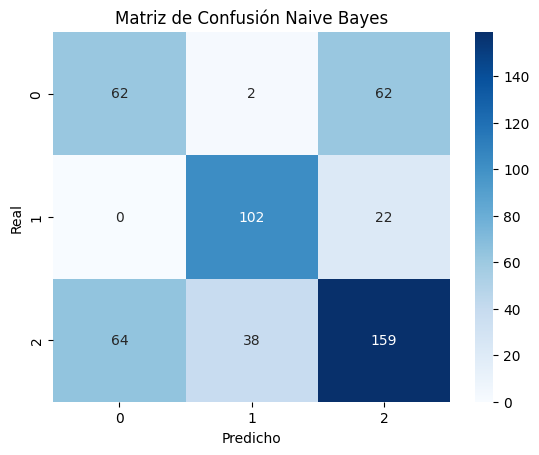

In [6]:
y_pred = modelo_nb.predict(X)
print(classification_report(y, y_pred))

# Matriz de Confusión visual
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión Naive Bayes")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

In [7]:
# Creamos un DataFrame nuevo solo para reglas
df_reglas = pd.DataFrame()

# Convertimos variables a texto para que sean legibles en las reglas
df_reglas['Es_Verano'] = df['season'] == 2
df_reglas['Es_Invierno'] = df['season'] == 4
df_reglas['Es_FinDeSemana'] = df['workingday'] == 0
df_reglas['Clima_Malo'] = df['clima_cat'] == 3
df_reglas['Demanda_Alta'] = df['demanda_nivel'] == 'Alta'

# Convertimos temperatura numérica a categoría (Frio vs Calor)
df_reglas['Hace_Calor'] = df['temp'] > 0.5
df_reglas['Hace_Frio'] = df['temp'] <= 0.3

# Apriori necesita Verdadero/Falso (o 1/0)
df_reglas = df_reglas.astype(bool)

print("Datos listos para minería de reglas:")
df_reglas.head()

Datos listos para minería de reglas:


,Es_Verano,Es_Invierno,Es_FinDeSemana,Clima_Malo,Demanda_Alta,Hace_Calor,Hace_Frio
0,False,False,False,False,False,True,False
1,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,True,True,False


In [8]:
# EJECUTA ESTO PRIMERO
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Ahora sí, tu código funcionará:
frequent_itemsets = apriori(df_reglas, min_support=0.05, use_colnames=True)
# ... el resto de tu código ...

# 1. Encontrar items frecuentes (que aparezcan en al menos el 5% de los días)
frequent_itemsets = apriori(df_reglas, min_support=0.05, use_colnames=True)

# 2. Generar reglas (Buscamos confianza > 50%)
reglas = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 3. Filtrar las reglas más interesantes (Queremos saber qué causa Demanda Alta)
# Buscamos reglas donde el consecuente sea 'Demanda_Alta'
reglas_top = reglas[reglas['consequents'] == {'Demanda_Alta'}].sort_values(by='confidence', ascending=False)

print("Top Reglas para tener ALTA DEMANDA:")
reglas_top[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

Top Reglas para tener ALTA DEMANDA:


,antecedents,consequents,support,confidence,lift
